## Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/gt_2011.csv')
df2 = pd.read_csv('/content/drive/MyDrive/gt_2012.csv')
df3 = pd.read_csv('/content/drive/MyDrive/gt_2013.csv')
df4 = pd.read_csv('/content/drive/MyDrive/gt_2014.csv')
df5 = pd.read_csv('/content/drive/MyDrive/gt_2015.csv')

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df5.tail()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

           CO      NOX  
7379  10.9930   89.172  
7380  11.1440   88.849  
7381  11.4140   96.147  
7382   3.3134   64.738  
7383  11.9810  109.240

In [ ]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1     4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2     3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3     3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4     3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

            CO      NOX  
0      0.32663   81.952  
1      0.44784   82.377  
2      0.45144   83.776  
3      0.23107   82.505  
4      0.26747   82.028  
...        ...      ...  
7379  10.99300   89.172  
7380  11.14400   88.849  
7381  11.41400   96.147  
7382   3.31340   64.738  
7383  11.98100  109.240  

[36733 rows x 11 columns]

In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634      1.088795      2.262672   
min     1000.800000    511.040000    100.020000      9.851800      0.000388   
25%     1071.800000    544.720000    124.450000     11.435000      1.182400   
50%     1085.900000    549.880000    133.730000     11.965000      1.713500   
75%     1097.000000    550.040000    144.080000     12.855000      2.842900   
max     1100.900000    550.610000    179.500000     15.159000     44.103000   

                NOX  
count  36733.000000  
mean      65.293067  
std       11.678357  
min       25.905000  
25%       57.162000  
50%       63.849000  
75%       71.548000  
max      119.910000

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  
0       0.32663   81.952  
1       0.44784   82.377  
2       0.45144   83.776  
3       0.23107   82.505  
4       0.26747   82.028  
...         ...      ...  
36728  10.99300   89.172  
36729  11.14400   88.849  
36730  11.41400   96.147  
36731   3.31340   64.738  
36732  11.98100  109.240  

[36733 rows x 11 columns]

In [ ]:
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634      1.088795      2.262672   
min     1000.800000    511.040000    100.020000      9.851800      0.000388   
25%     1071.800000    544.720000    124.450000     11.435000      1.182400   
50%     1085.900000    549.880000    133.730000     11.965000      1.713500   
75%     1097.000000    550.040000    144.080000     12.855000      2.842900   
max     1100.900000    550.610000    179.500000     15.159000     44.103000   

                NOX  
count  36733.000000  
mean      65.293067  
std       11.678357  
min       25.905000  
25%       57.162000  
50%       63.849000  
75%       71.548000  
max      119.910000

# Graphs

##HeatMap


<Figure size 700x500 with 0 Axes>

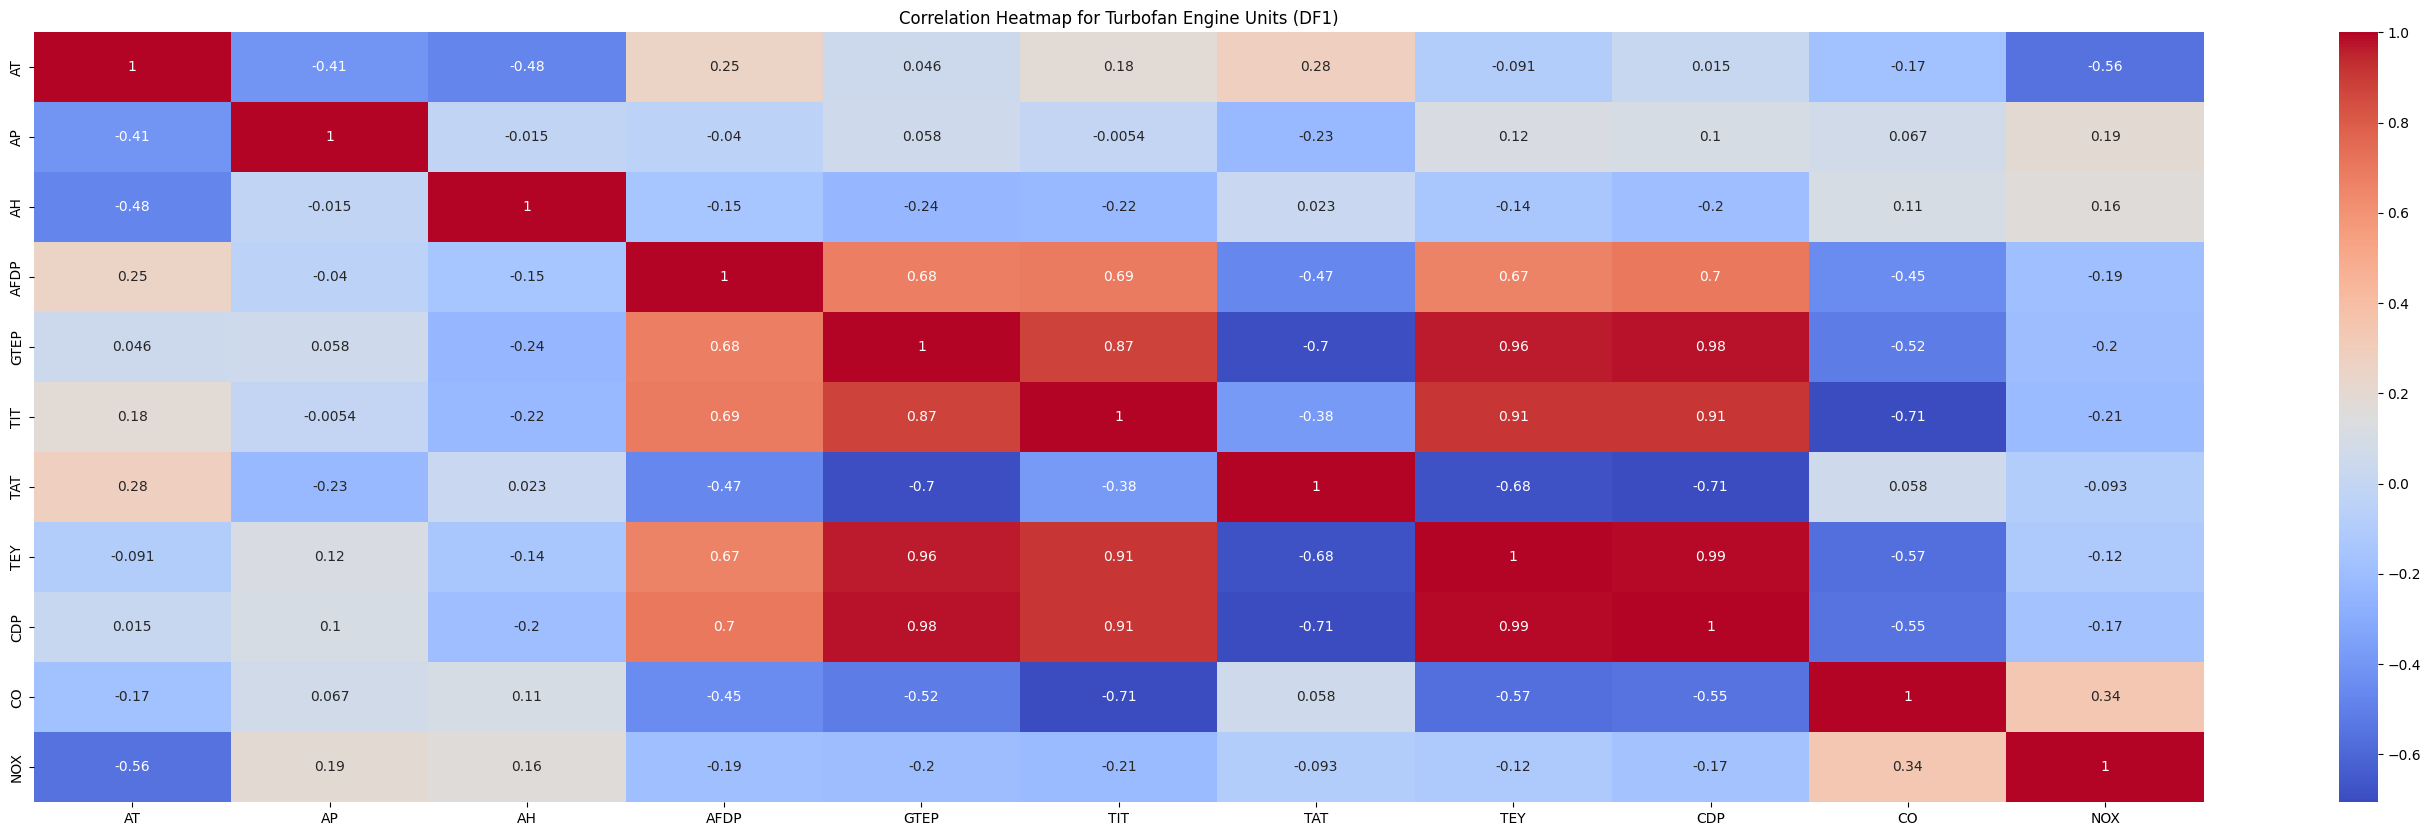

In [ ]:
plt.figure(figsize=(7,5))

# # Create a correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(35, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
sns.color_palette("mako", as_cmap=True)
plt.title('Correlation Heatmap for Turbofan Engine Units (DF1)')
plt.show()

# Kmeans for whole

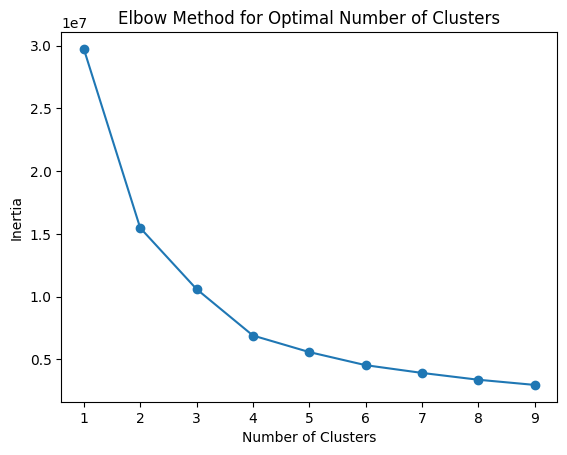

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset into a pandas DataFrame
data = df

# Select the data for clustering
X = data[features]

# Apply PCA to reduce the features to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-means clustering with different numbers of clusters and calculate the inertia
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    inertia.append(kmeans.inertia_)

# Visualize the inertia vs. number of clusters using a line plot
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


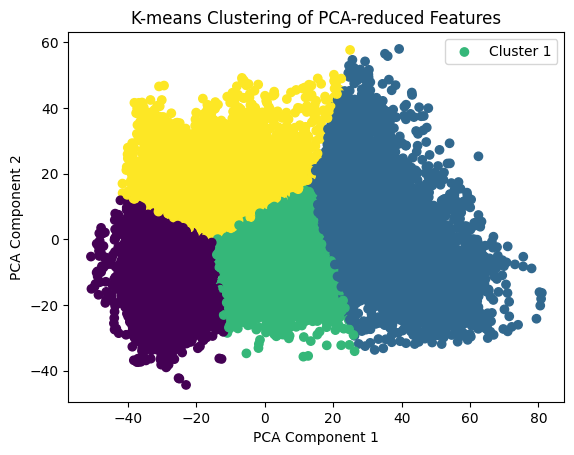

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset into a pandas DataFrame
data = df
# Define the features for clustering
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

# Select the data for clustering
X = data[features]

# Define the number of clusters
k = 4

# Apply PCA to reduce the features to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-means clustering to the reduced features
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_pca)

# Add the cluster labels to the DataFrame
data['cluster'] = kmeans.labels_

# Visualize the clusters using scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of PCA-reduced Features')
plt.legend(labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.show()


# Elbow Method and Clusters for NOX

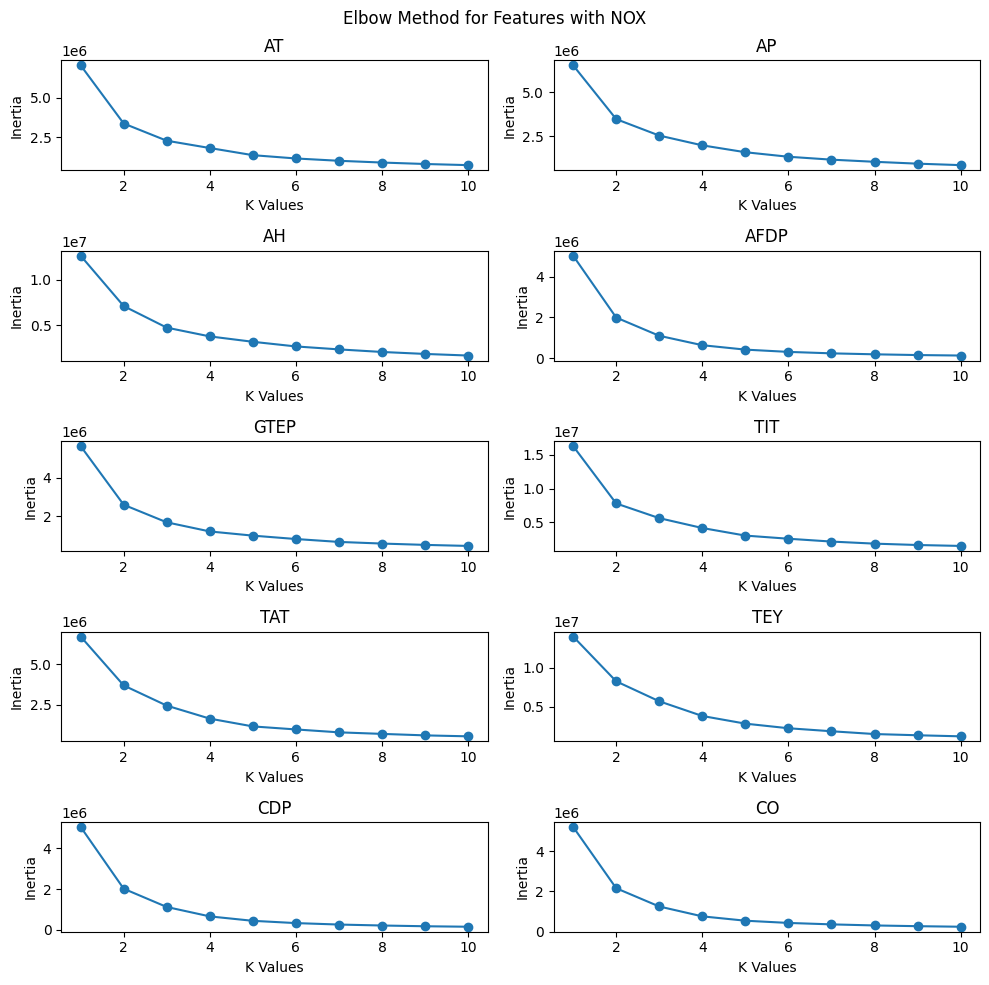

In [ ]:
from sklearn.cluster import KMeans

features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))

# Loop through each feature and create a scatter plot with CO
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    X = df[[feature, target]]
    inertia = []
    for k in range(1,11):
      kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
      inertia.append(kmeans.inertia_)

    axs[row, col].plot(range(1,11), inertia, marker='o')
    axs[row, col].set_xlabel("K Values")
    axs[row, col].set_ylabel("Inertia")
    axs[row, col].set_title(feature)

fig.suptitle('Elbow Method for Features with NOX')
fig.tight_layout()

# Show the plot
plt.show()


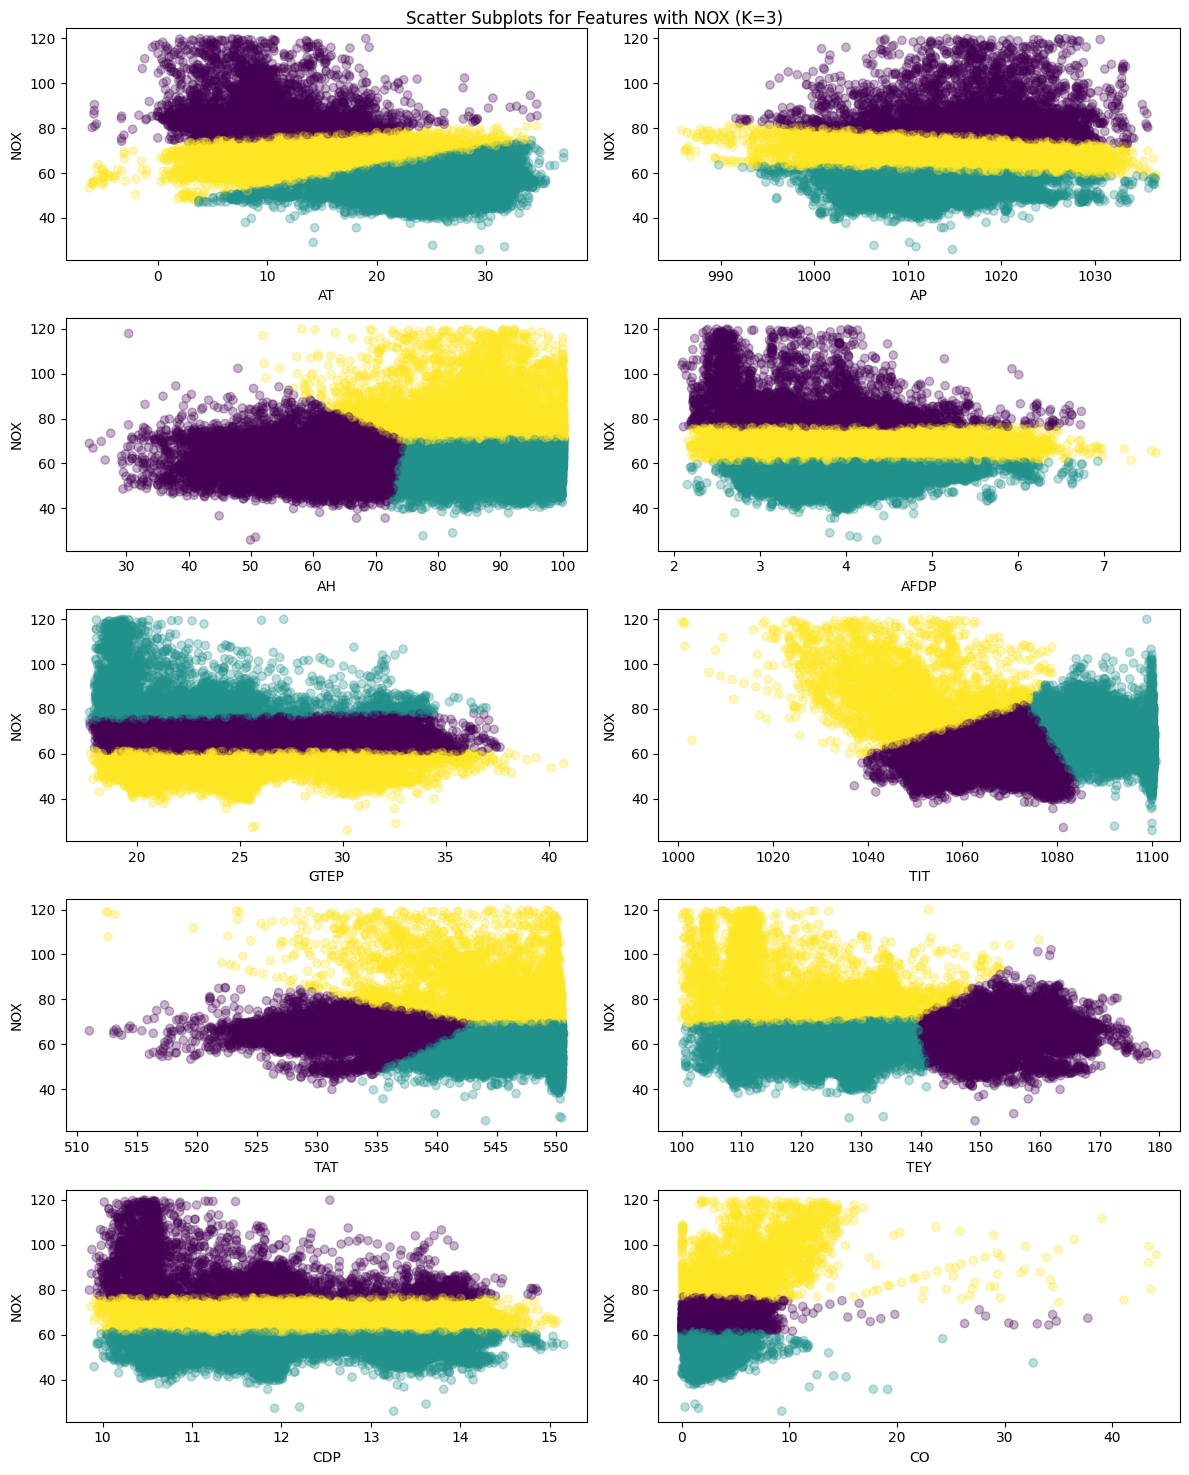

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'

# Define the number of clusters
k = 3

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Loop through each feature and create a scatter plot with NOX
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Select the data for clustering
    X = df[[feature, target]]

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

    # Add the cluster labels to the DataFrame
    df['cluster'] = kmeans.labels_

    # Visualize the clusters using scatter plot
    axs[row, col].scatter(df[feature], df[target], c=df['cluster'] , alpha=0.3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)

fig.suptitle('Scatter Subplots for Features with NOX (K=3)')
fig.tight_layout()
plt.show()


# Elbow method and Clusters for CO


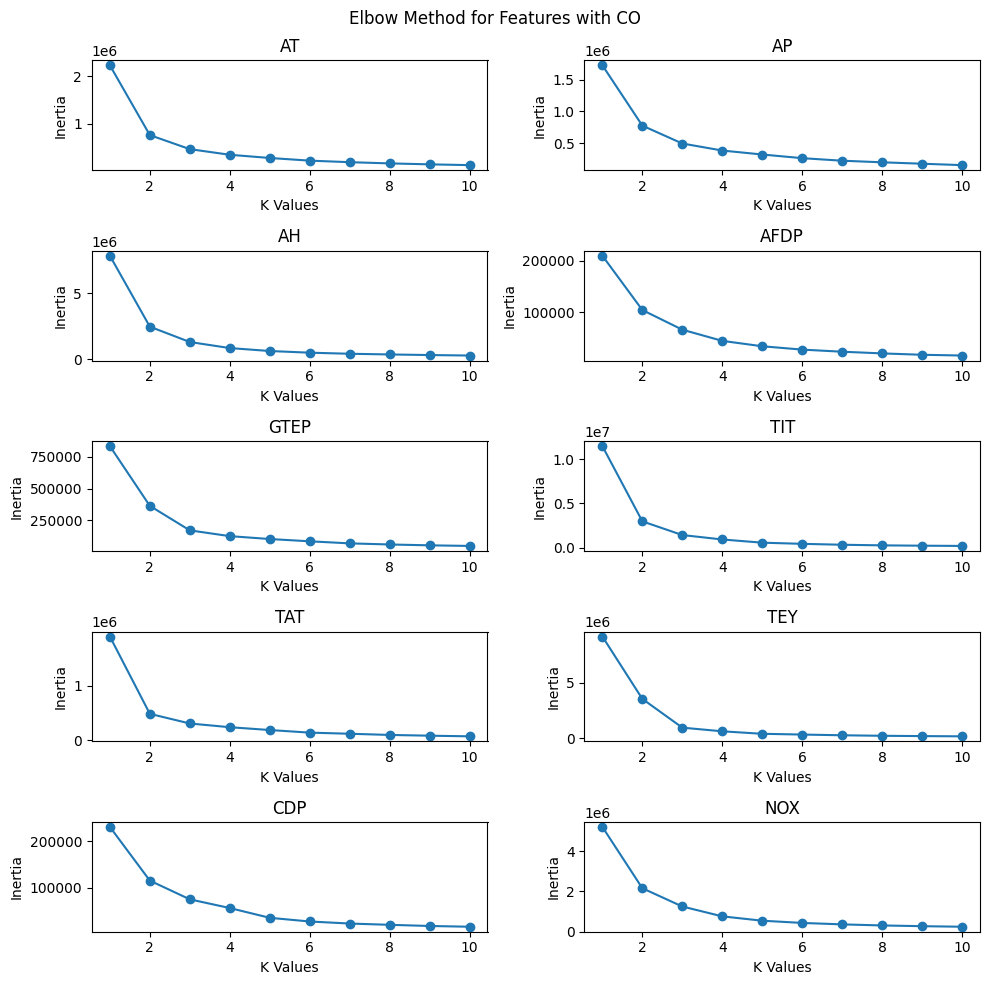

In [ ]:
from sklearn.cluster import KMeans

features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'
k = 2

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))

# Loop through each feature and create a scatter plot with CO
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    X = df[[feature, target]]
    inertia = []
    for k in range(1,11):
      kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
      inertia.append(kmeans.inertia_)

    axs[row, col].plot(range(1,11), inertia, marker='o')
    axs[row, col].set_xlabel("K Values")
    axs[row, col].set_ylabel("Inertia")
    axs[row, col].set_title(feature)

fig.suptitle('Elbow Method for Features with CO')
fig.tight_layout()

# Show the plot
plt.show()


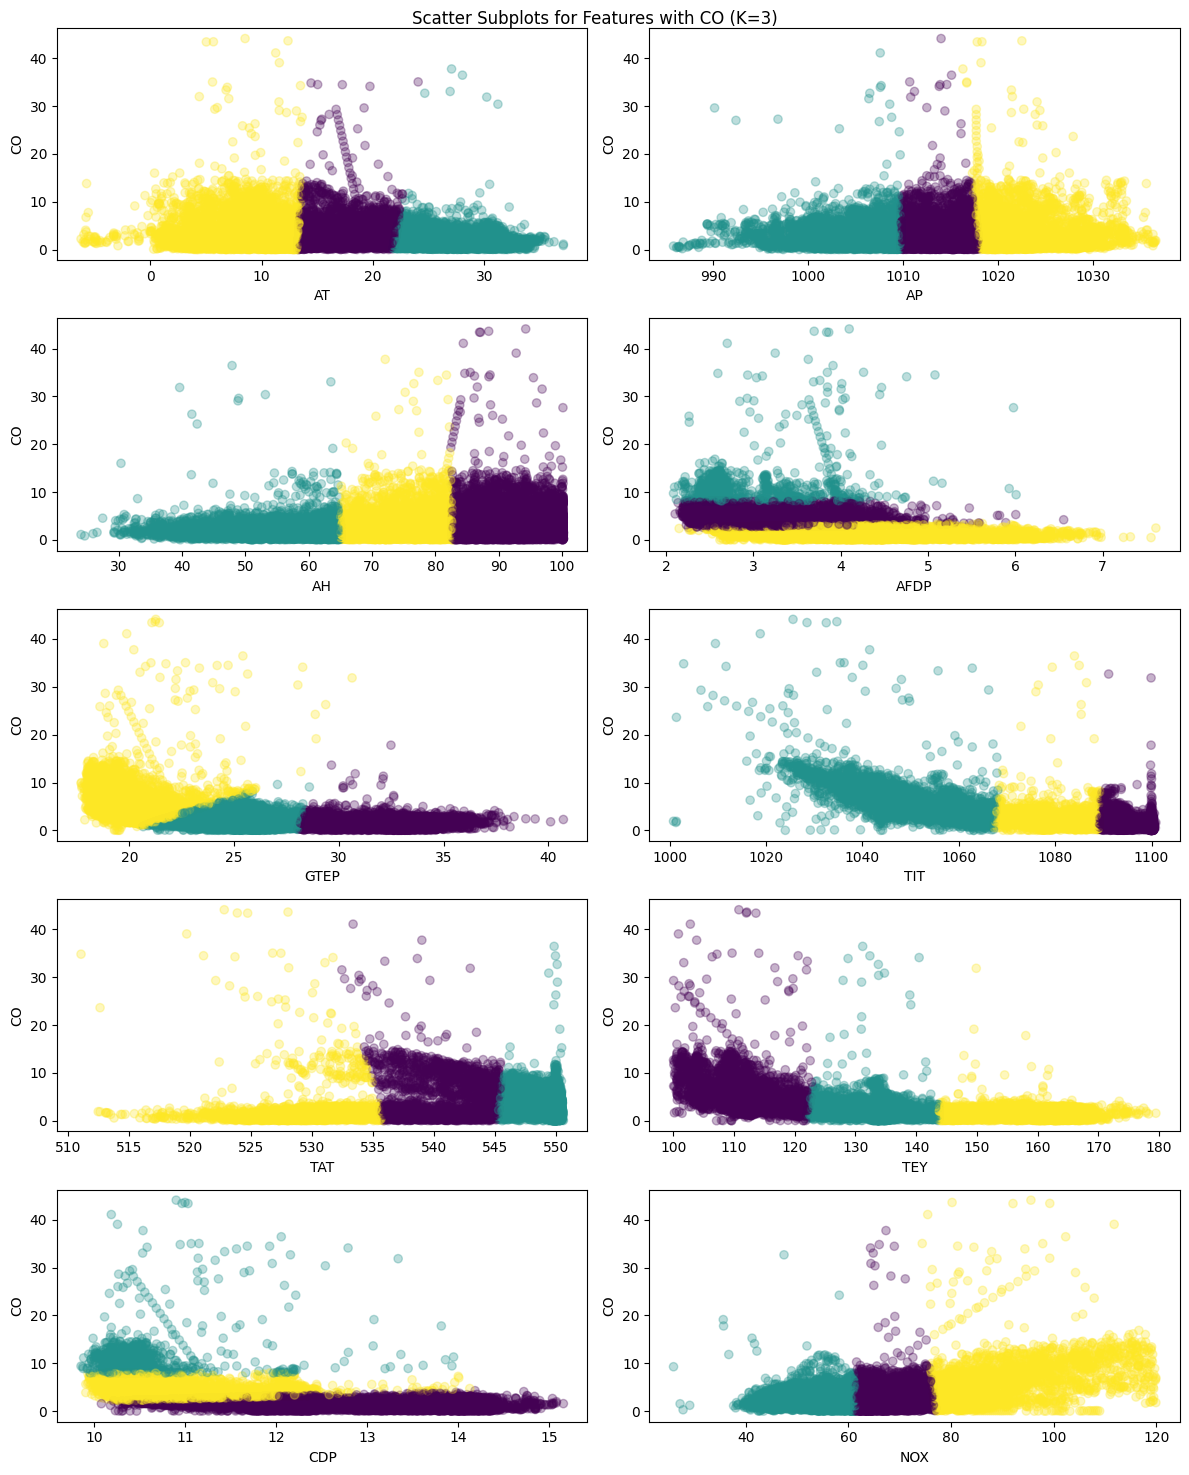

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'

# Define the number of clusters
k = 3

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Loop through each feature and create a scatter plot with NOX
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Select the data for clustering
    X = df[[feature, target]]

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)


    # Add the cluster labels to the DataFrame
    df['cluster'] = kmeans.labels_

    # Visualize the clusters using scatter plot
    axs[row, col].scatter(df[feature], df[target], c=df['cluster'] , alpha=0.3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)

fig.suptitle('Scatter Subplots for Features with CO (K=3)')
fig.tight_layout()
plt.show()


# DBSCAN for CO

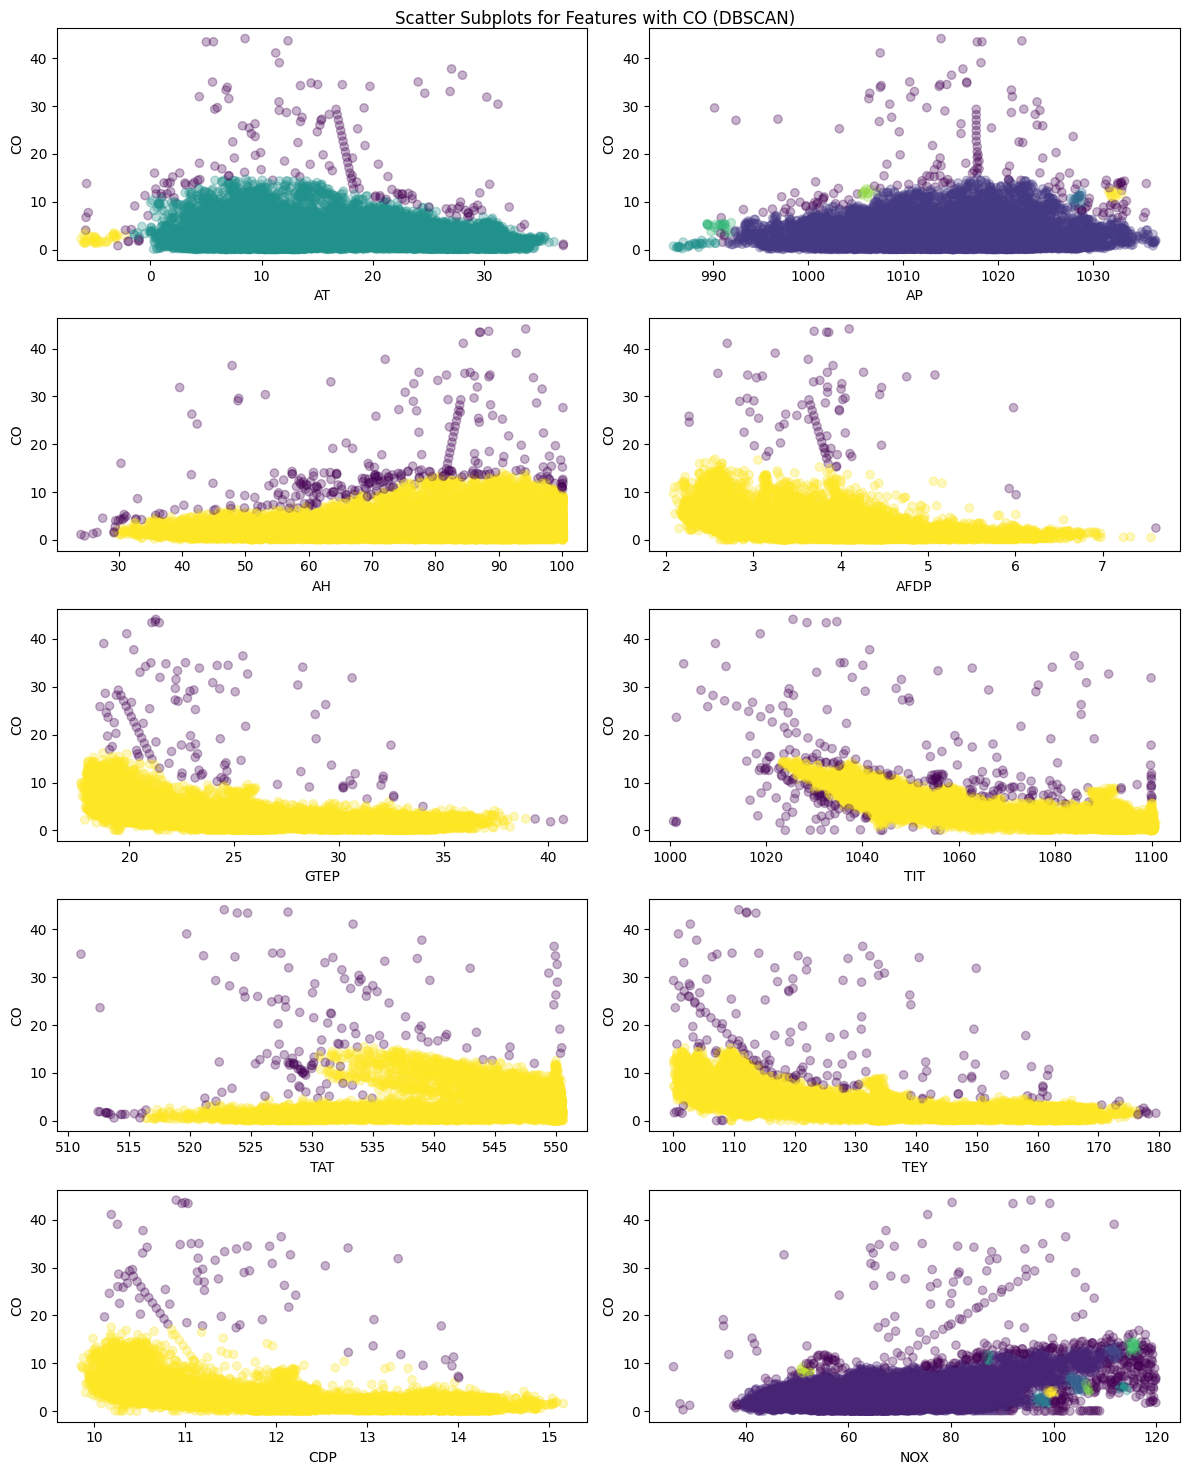

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Loop through each feature and create a scatter plot with NOX
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Select the data for clustering
    X = df[[feature, target]]

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=1, min_samples=10).fit(X)

    # Add the cluster labels to the DataFrame
    df['cluster'] = dbscan.labels_

    # Visualize the clusters using scatter plot
    axs[row, col].scatter(df[feature], df[target], c=df['cluster'] , alpha=0.3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)

fig.suptitle('Scatter Subplots for Features with CO (DBSCAN)')
fig.tight_layout()
plt.show()


# DBSCAN for NOX

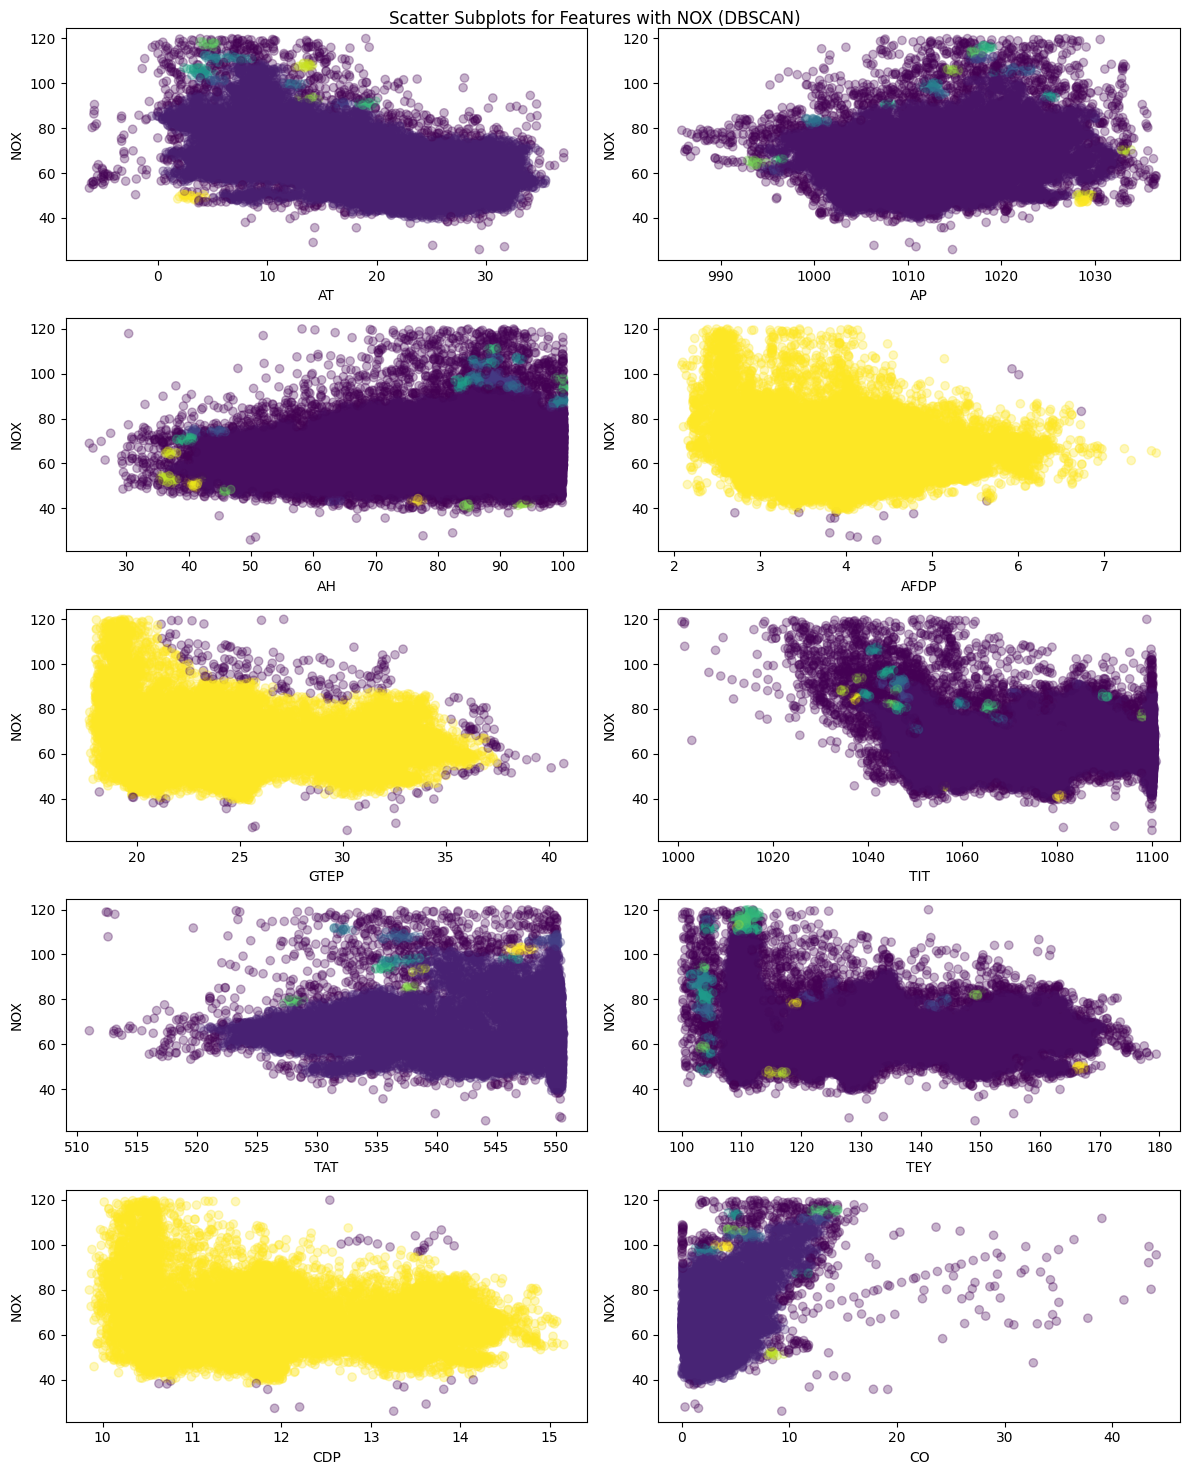

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Loop through each feature and create a scatter plot with NOX
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Select the data for clustering
    X = df[[feature, target]]

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=1, min_samples=10).fit(X)

    # Add the cluster labels to the DataFrame
    df['cluster'] = dbscan.labels_

    # Visualize the clusters using scatter plot
    axs[row, col].scatter(df[feature], df[target], c=df['cluster'] , alpha=0.3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)

fig.suptitle('Scatter Subplots for Features with NOX (DBSCAN)')
fig.tight_layout()
plt.show()


# CURE for CO


In [ ]:
pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395118 sha256=f193c426cc0ec94866b1d06106357653106f55cf59dc17a57a83d23ccc9225ab
  Stored in directory: /root/.cache/pip/wheels/e0/56/c2/abb6866a3fcd8a55862f1df8a18f57805c3a78fed9a9023cb9
Successfully built pyclustering


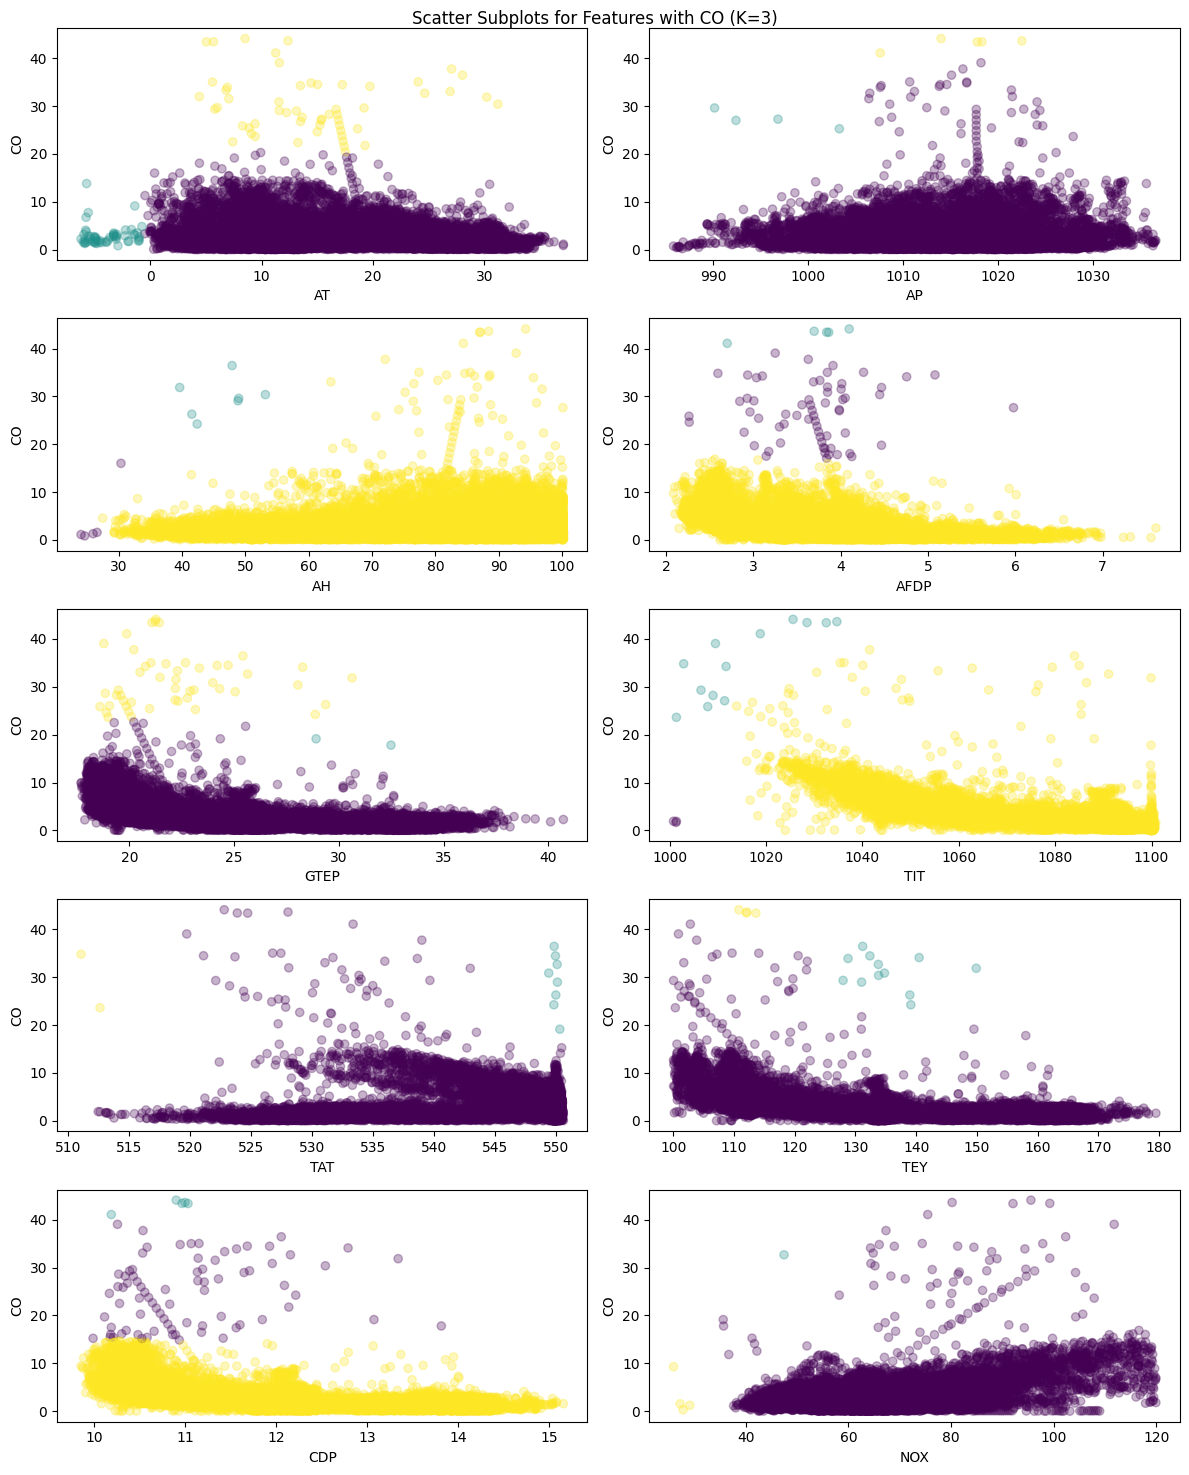

In [ ]:
from pyclustering.cluster.cure import cure
import matplotlib.pyplot as plt

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'

# Define the number of clusters
k = 3

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Loop through each feature and create a scatter plot with NOX
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Select the data for clustering
    X = df[[feature, target]].values

    # Apply CURE clustering
    cure_instance = cure(X, k)
    cure_instance.process()

    # Get the cluster labels
    labels = cure_instance.get_clusters()

    # Add the cluster labels to the DataFrame
    df['cluster'] = -1
    for cluster_id, cluster in enumerate(labels):
        df.loc[cluster, 'cluster'] = cluster_id

    # Visualize the clusters using scatter plot
    axs[row, col].scatter(df[feature], df[target], c=df['cluster'], alpha=0.3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)

fig.suptitle('Scatter Subplots for Features with CO (K=3)')
fig.tight_layout()
plt.show()


# CURE for NOX

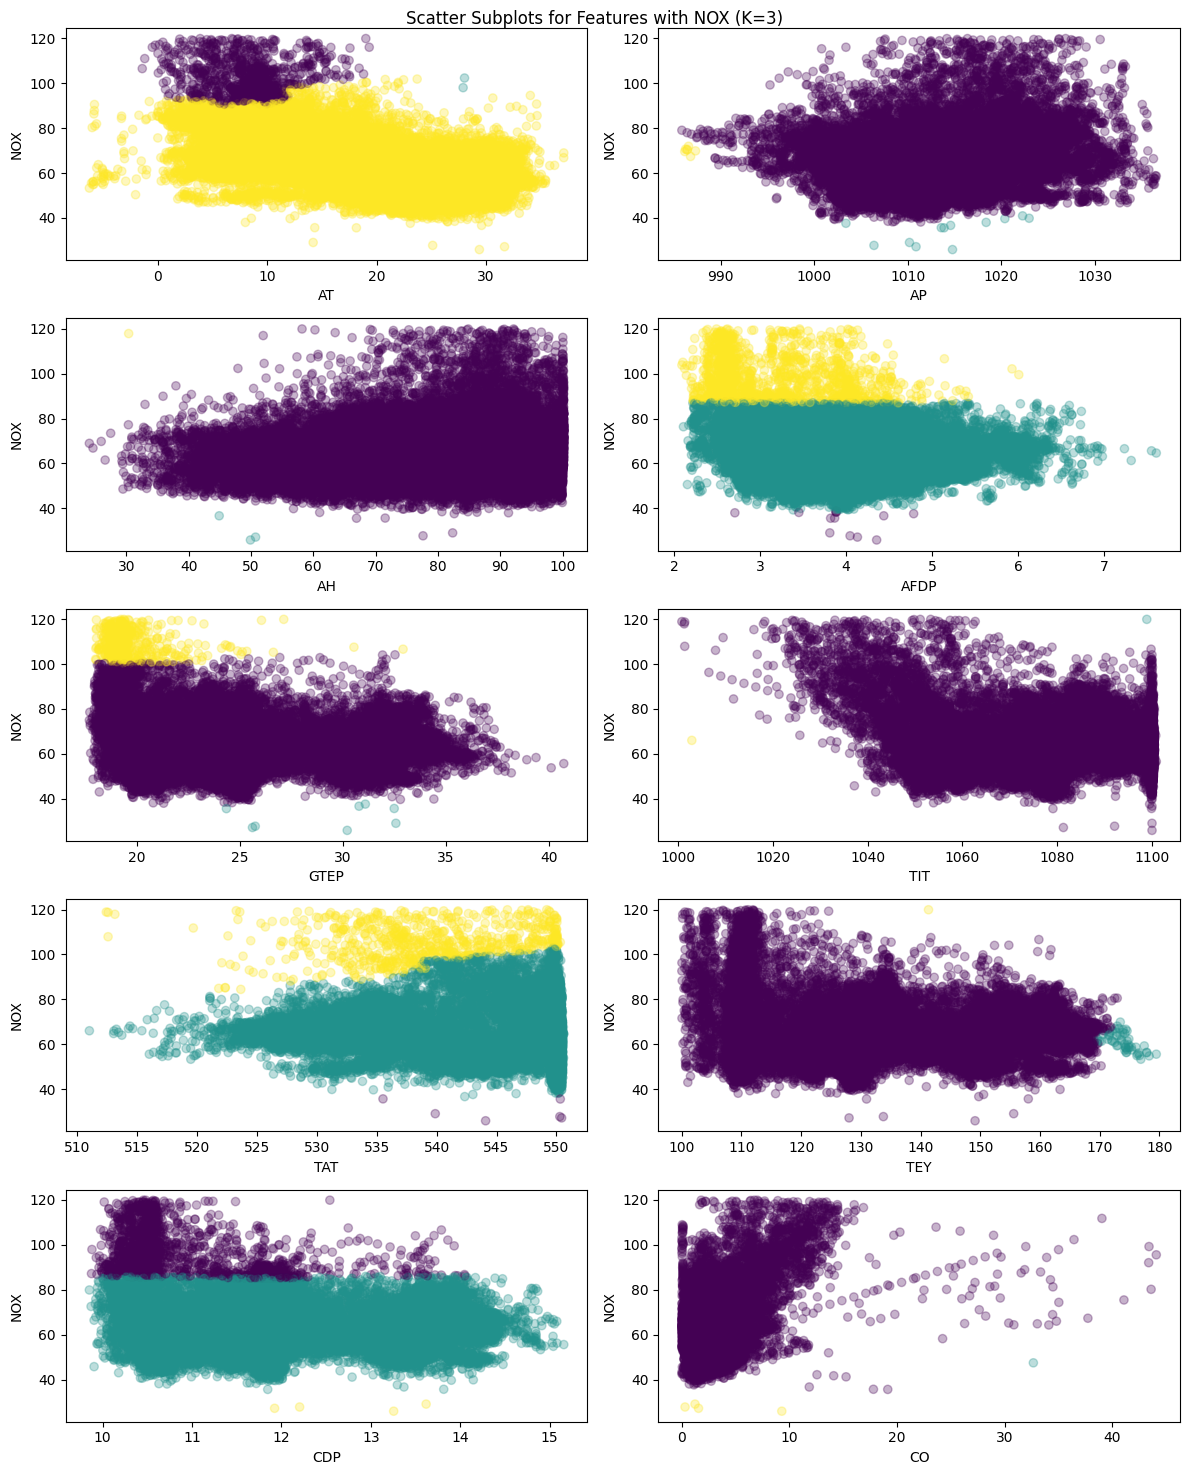

In [ ]:
from pyclustering.cluster.cure import cure
import matplotlib.pyplot as plt

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'

# Define the number of clusters
k = 3

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Loop through each feature and create a scatter plot with NOX
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Select the data for clustering
    X = df[[feature, target]].values

    # Apply CURE clustering
    cure_instance = cure(X, k)
    cure_instance.process()

    # Get the cluster labels
    labels = cure_instance.get_clusters()

    # Add the cluster labels to the DataFrame
    df['cluster'] = -1
    for cluster_id, cluster in enumerate(labels):
        df.loc[cluster, 'cluster'] = cluster_id

    # Visualize the clusters using scatter plot
    axs[row, col].scatter(df[feature], df[target], c=df['cluster'], alpha=0.3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)

fig.suptitle('Scatter Subplots for Features with NOX (K=3)')
fig.tight_layout()
plt.show()


# BIRCH for CO

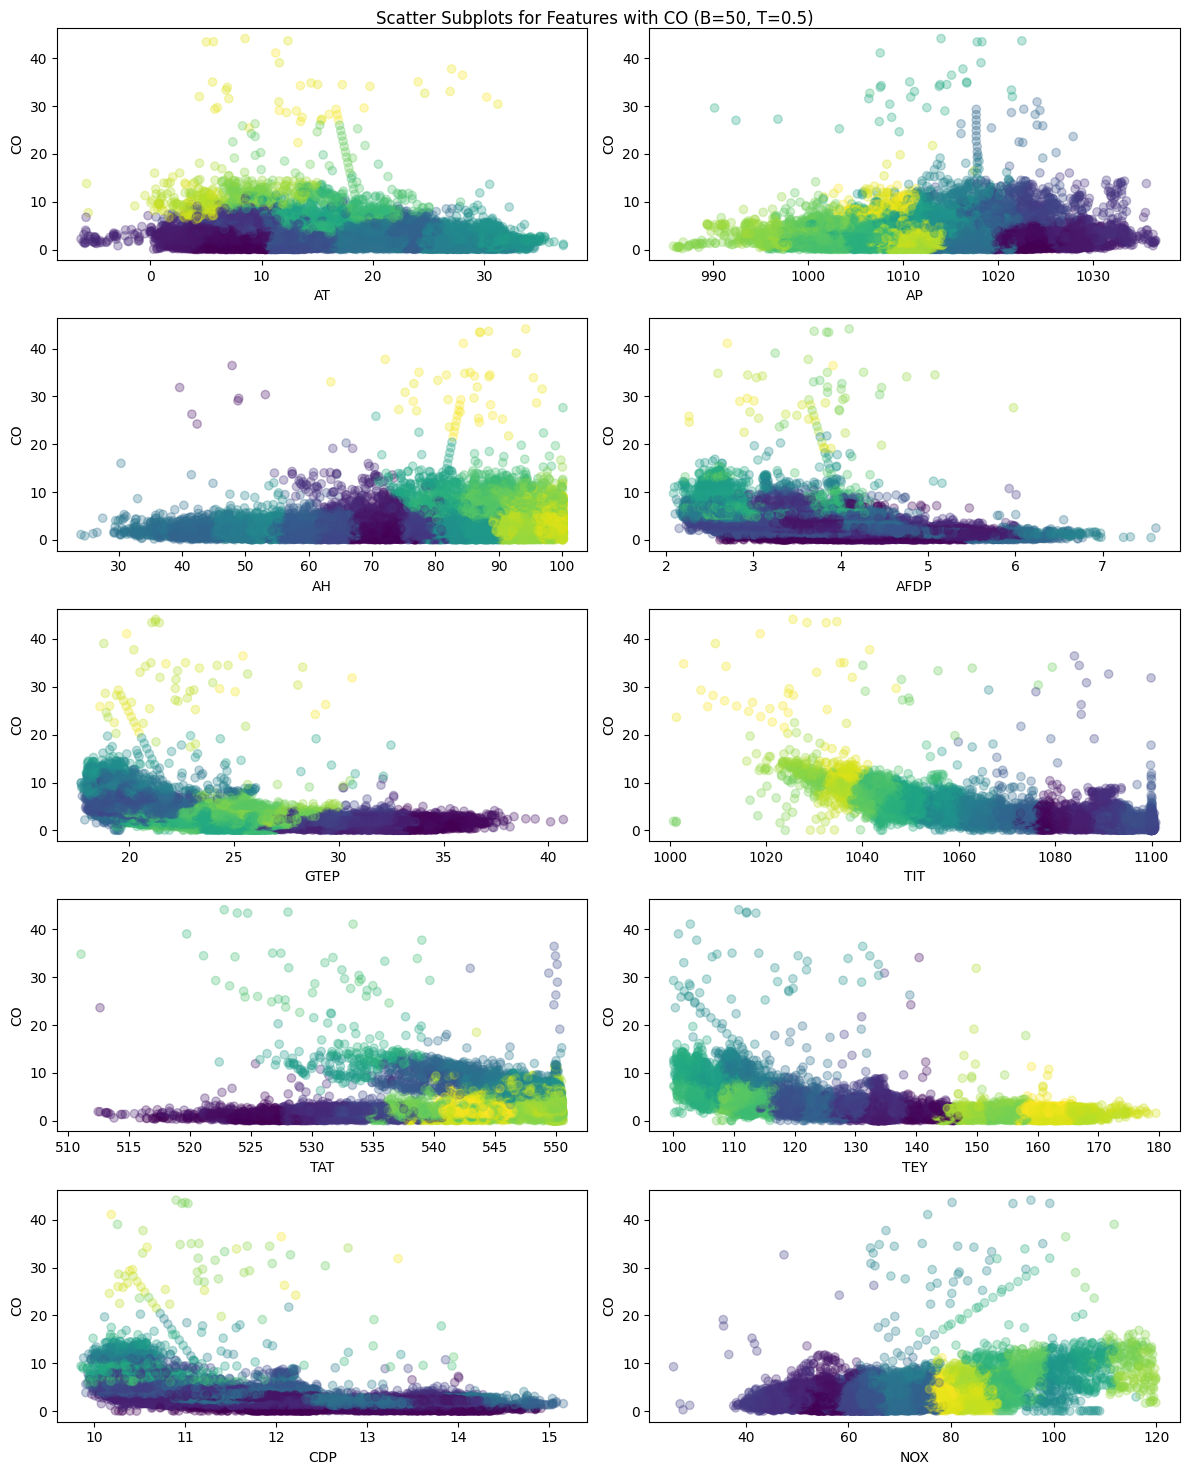

In [ ]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'

# Define the branching factor and threshold
b = 50
t = 0.5

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Loop through each feature and create a scatter plot with NOX
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Select the data for clustering
    X = df[[feature, target]]

    # Apply Birch clustering
    birch = Birch(branching_factor=b, threshold=t, n_clusters=None).fit(X)

    # Add the cluster labels to the DataFrame
    df['cluster'] = birch.predict(X)

    # Visualize the clusters using scatter plot
    axs[row, col].scatter(df[feature], df[target], c=df['cluster'], alpha=0.3)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)

fig.suptitle('Scatter Subplots for Features with CO (B={}, T={})'.format(b, t))
fig.tight_layout()
plt.show()


# BIRCH for NOX

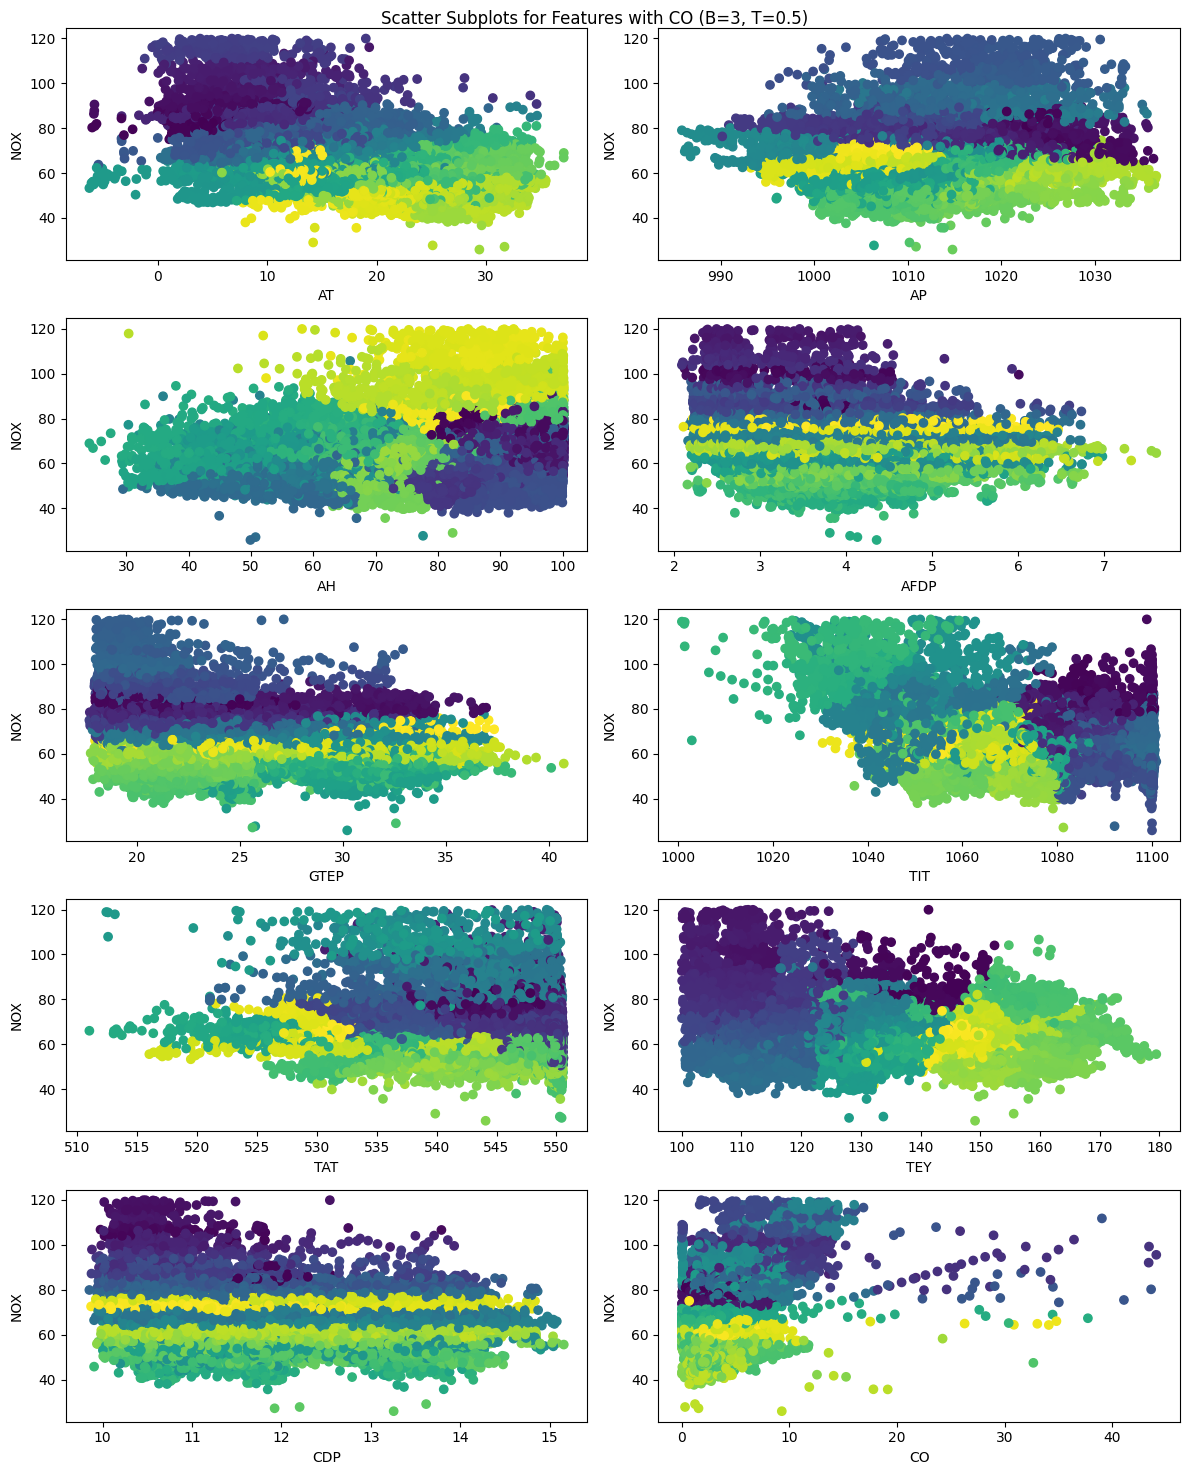

In [ ]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'

# Define the branching factor and threshold
b = 3
t = 0.5

# Create subplots for each feature
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Loop through each feature and create a scatter plot with NOX
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # Select the data for clustering
    X = df[[feature, target]]

    # Apply Birch clustering
    birch = Birch(branching_factor=b, threshold=t, n_clusters=None).fit(X)

    # Add the cluster labels to the DataFrame
    df['cluster'] = birch.predict(X)

    # Visualize the clusters using scatter plot
    axs[row, col].scatter(df[feature], df[target], c=df['cluster'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel(target)

fig.suptitle('Scatter Subplots for Features with CO (B={}, T={})'.format(b, t))
fig.tight_layout()
plt.show()


# Metrics


In [ ]:
pip install pyclustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'

# Loop through each feature and calculate Silhouette score
for feature in features:
    # Select the data for clustering
    X = df[[feature, target]].values

    # Set the number of clusters to 3
    kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

    # Calculate the Silhouette score
    silhouette = silhouette_score(X, kmeans.labels_)

    # Print the Silhouette score for each feature
    print(f"Silhouette score for {feature}: {silhouette}")


Silhouette score for AT: 0.3961688239819185
Silhouette score for AP: 0.34746005515481165
Silhouette score for AH: 0.39776234507924274
Silhouette score for AFDP: 0.519072627763024
Silhouette score for GTEP: 0.40377723179788283
Silhouette score for TIT: 0.4642870720099374
Silhouette score for TAT: 0.5052670788520043
Silhouette score for TEY: 0.40397064541291555
Silhouette score for CDP: 0.5093459328054244
Silhouette score for CO: 0.49522652305149467


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'

# Loop through each feature and calculate Silhouette score
for feature in features:
    # Select the data for clustering
    X = df[[feature, target]].values

    # Set the number of clusters to 3
    kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

    # Calculate the Silhouette score
    silhouette = silhouette_score(X, kmeans.labels_)

    # Print the Silhouette score for each feature
    print(f"Silhouette score for {feature}: {silhouette}")


Silhouette score for AT: 0.47353702719068047
Silhouette score for AP: 0.445467626383221
Silhouette score for AH: 0.5268384733249509
Silhouette score for AFDP: 0.58216830716619
Silhouette score for GTEP: 0.6192034658284981
Silhouette score for TIT: 0.6028964717169616
Silhouette score for TAT: 0.6931295487070628
Silhouette score for TEY: 0.7037917852745906
Silhouette score for CDP: 0.5698462473014363
Silhouette score for NOX: 0.49522652305149467


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'

# Define the DBSCAN parameters
eps = 1
min_samples = 10

# Loop through each feature and calculate the Silhouette score
for feature in features:
    # Select the data for clustering
    X = df[[feature, target]].values

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)

    # Calculate the Silhouette score
    silhouette = silhouette_score(X, y_pred)

    # Print the Silhouette score for each feature
    print(f"Silhouette score for {feature} vs NOX in DBSCAN: {silhouette:.3f}")


Silhouette score for AT vs NOX in DBSCAN: 0.159
Silhouette score for AP vs NOX in DBSCAN: -0.051
Silhouette score for AH vs NOX in DBSCAN: -0.236
Silhouette score for AFDP vs NOX in DBSCAN: 0.576
Silhouette score for GTEP vs NOX in DBSCAN: 0.496
Silhouette score for TIT vs NOX in DBSCAN: -0.390
Silhouette score for TAT vs NOX in DBSCAN: 0.259
Silhouette score for TEY vs NOX in DBSCAN: -0.387
Silhouette score for CDP vs NOX in DBSCAN: 0.622
Silhouette score for CO vs NOX in DBSCAN: -0.005


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'

# Define the DBSCAN parameters
eps = 1
min_samples = 10

# Loop through each feature and calculate the Silhouette score
for feature in features:
    # Select the data for clustering
    X = df[[feature, target]].values

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)

    # Calculate the Silhouette score
    silhouette = silhouette_score(X, y_pred)

    # Print the Silhouette score for each feature
    print(f"Silhouette score for {feature} vs CO in DBSCAN: {silhouette:.3f}")


Silhouette score for AT vs CO in DBSCAN: 0.482
Silhouette score for AP vs CO in DBSCAN: 0.294
Silhouette score for AH vs CO in DBSCAN: 0.364
Silhouette score for AFDP vs CO in DBSCAN: 0.903
Silhouette score for GTEP vs CO in DBSCAN: 0.733
Silhouette score for TIT vs CO in DBSCAN: 0.484
Silhouette score for TAT vs CO in DBSCAN: 0.700
Silhouette score for TEY vs CO in DBSCAN: 0.394
Silhouette score for CDP vs CO in DBSCAN: 0.893
Silhouette score for NOX vs CO in DBSCAN: -0.005


In [ ]:
from pyclustering.cluster.cure import cure
from sklearn.metrics import silhouette_score
import numpy as np

features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'
k = 3

# Loop through each feature and calculate the silhouette score
for feature in features:
    # Select the data for clustering
    X = df[[feature, target]].values

    # Apply CURE clustering
    cure_instance = cure(X, k)
    cure_instance.process()

    # Get the cluster labels
    labels = cure_instance.get_clusters()

    # Flatten the labels
    flat_labels = np.zeros(X.shape[0], dtype=int)
    for i, cluster in enumerate(labels):
        flat_labels[cluster] = i

    # Calculate the silhouette score
    silhouette = silhouette_score(X, flat_labels)

    print(f'Silhouette score for {feature} vs CO in CURE clustering: {silhouette:.4f}')


Silhouette score for AT vs CO in CURE clustering: 0.5186
Silhouette score for AP vs CO in CURE clustering: 0.7434
Silhouette score for AH vs CO in CURE clustering: 0.5692
Silhouette score for AFDP vs CO in CURE clustering: 0.9031
Silhouette score for GTEP vs CO in CURE clustering: 0.6894
Silhouette score for TIT vs CO in CURE clustering: 0.7046
Silhouette score for TAT vs CO in CURE clustering: 0.7455
Silhouette score for TEY vs CO in CURE clustering: 0.4755
Silhouette score for CDP vs CO in CURE clustering: 0.8847
Silhouette score for NOX vs CO in CURE clustering: 0.6108


In [ ]:
from pyclustering.cluster.cure import cure
from sklearn.metrics import silhouette_score
import numpy as np

features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'
k = 3

# Loop through each feature and calculate the silhouette score
for feature in features:
    # Select the data for clustering
    X = df[[feature, target]].values

    # Apply CURE clustering
    cure_instance = cure(X, k)
    cure_instance.process()

    # Get the cluster labels
    labels = cure_instance.get_clusters()

    # Flatten the labels
    flat_labels = np.zeros(X.shape[0], dtype=int)
    for i, cluster in enumerate(labels):
        flat_labels[cluster] = i

    # Calculate the silhouette score
    silhouette = silhouette_score(X, flat_labels)

    print(f'Silhouette score for {feature} vs NOX in CURE clustering: {silhouette:.4f}')


In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import pandas as pd

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'NOX']
target = 'CO'

# Loop through each feature and calculate the Silhouette score
for feature in features:
    X = df[[feature, target]]
    brc = Birch(n_clusters=2)
    brc.fit(X)
    labels = brc.labels_
    score = silhouette_score(X, labels)
    print(f"Silhouette score for {feature} vs {target}: {score}")


Silhouette score for AT vs CO: 0.3945645238862977
Silhouette score for AP vs CO: 0.49422984161287703
Silhouette score for AH vs CO: 0.5829918618655417
Silhouette score for AFDP vs CO: 0.9166446218458452
Silhouette score for GTEP vs CO: 0.7970232268415521
Silhouette score for TIT vs CO: 0.5293166235355204
Silhouette score for TAT vs CO: 0.7795638822063331
Silhouette score for TEY vs CO: 0.6054706611386165
Silhouette score for CDP vs CO: 0.9094821633491421
Silhouette score for NOX vs CO: 0.5575474071216499


In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import pandas as pd

# Define the features and target variable
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']
target = 'NOX'

# Loop through each feature and calculate the Silhouette score
for feature in features:
    X = df[[feature, target]]
    brc = Birch(n_clusters=2)
    brc.fit(X)
    labels = brc.labels_
    score = silhouette_score(X, labels)
    print(f"Silhouette score for {feature} vs {target}: {score}")


Silhouette score for AT vs NOX: 0.4805744409719463
Silhouette score for AP vs NOX: 0.40858123067986757
Silhouette score for AH vs NOX: 0.22845073078094444
Silhouette score for AFDP vs NOX: 0.6070469295613848
Silhouette score for GTEP vs NOX: 0.37332402290819994
Silhouette score for TIT vs NOX: 0.5271465766965793
Silhouette score for TAT vs NOX: 0.6182837871033224
Silhouette score for TEY vs NOX: 0.287519340409105
Silhouette score for CDP vs NOX: 0.5717422645068512
Silhouette score for CO vs NOX: 0.5575474071216499
